# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Dataset contains information about 10,000 movies from The Movie database (TMDb). There are 10,866 observation and 21 features in the dataset.

### Research Questions
1. Which year has the highest vote average. 
2. Are more movies produced yearly.
3. Are movies run time getting longer over the years.
4. Is the film industry making profit over the years.
5. Which genres are most popular from year to year.
6. What kinds of properties are associated with movies that have high revenues?

### Import Modules for Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Import data into pandas dataframe

df = pd.read_csv(r'C:\Users\TIMOTHY\Desktop\udacity project\dataset\tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# number of rows and columns in the dataframe
df.shape

(10866, 21)

In [4]:
# check for column names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
# drop columns that are not relevant for the analysis

df.drop(['imdb_id', 'budget_adj', 'revenue_adj', 'original_title', 'homepage', 'keywords',
         'director', 'tagline', 'production_companies', 'overview', 'cast'],
        axis=1, inplace=True)

In [6]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10866 non-null  int64  
 1   popularity    10866 non-null  float64
 2   budget        10866 non-null  int64  
 3   revenue       10866 non-null  int64  
 4   runtime       10866 non-null  int64  
 5   genres        10843 non-null  object 
 6   release_date  10866 non-null  object 
 7   vote_count    10866 non-null  int64  
 8   vote_average  10866 non-null  float64
 9   release_year  10866 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 849.0+ KB


In [7]:
# check for null values in each features/columns

df.isnull().sum()

id               0
popularity       0
budget           0
revenue          0
runtime          0
genres          23
release_date     0
vote_count       0
vote_average     0
release_year     0
dtype: int64

In [8]:
# Summary statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


The `release_date` is in string format needs to be changed to python datetime format. The minimum `runtime` is `0` which is not a valid entry therefore it will be replaced with nan and dropped. The same applies to `budget` and `revenue`

### Data Cleaning

In [9]:
# change release_date from object to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
# Fill zero with nan in runtime, budget and revenue
df[['runtime', 'budget', 'revenue']] = df[['runtime', 'budget', 'revenue']].replace({0:np.nan})

In [11]:
# drop nan in the dataframe
df.dropna(inplace=True)
df.shape

(3855, 10)

In [12]:
# drop duplicates in the dataframe

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [13]:
# Recheck for null values
df.isna().sum()

id              0
popularity      0
budget          0
revenue         0
runtime         0
genres          0
release_date    0
vote_count      0
vote_average    0
release_year    0
dtype: int64

In [14]:
# Check for feature datatype if appropriate
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            3854 non-null   int64         
 1   popularity    3854 non-null   float64       
 2   budget        3854 non-null   float64       
 3   revenue       3854 non-null   float64       
 4   runtime       3854 non-null   float64       
 5   genres        3854 non-null   object        
 6   release_date  3854 non-null   datetime64[ns]
 7   vote_count    3854 non-null   int64         
 8   vote_average  3854 non-null   float64       
 9   release_year  3854 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 331.2+ KB


The data is now appropriate for analysis

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which year has the highest vote average.

In [15]:
# calculate the vote average per year
h_avg = df.groupby('release_year', as_index=False)['vote_average'].mean()
h_avg.head()

,release_year,vote_average
0,1960,7.400000
1,1961,6.620000
2,1962,6.900000
3,1963,6.766667
4,1964,6.971429


In [16]:
# filter the year with the highest vote average
h_avg[h_avg['vote_average'] == h_avg['vote_average'].max()]

,release_year,vote_average
0,1960,7.4


The highest vote average was in the year 1960, why? is the rating going bad by the year? lets plot a chat to see the trend over the years.

In [17]:
# Define a function to plot line charts
def chart(Dataframe, x_values, x_label, y_values, y_label, title, colour):
    Dataframe.plot(x=x_values, y=y_values, color=colour, figsize=(10,5), grid=True)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, fontsize=16)
    plt.show()

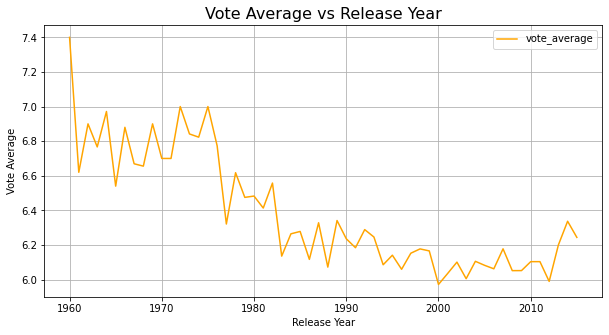

In [18]:
chart(h_avg, 'release_year', 'Release Year', 'vote_average', 'Vote Average', 'Vote Average vs Release Year', 'orange')

The rating has been going down over the years and is likely the movie industry is not profitable.

### Research Question 2: Are more movies produced yearly.

In [19]:
# Calculate total number of movies produced per year 
df_movie = df['release_year'].value_counts().sort_index(ascending=True)

In [20]:
# Define a function to plot horizontal barcharts
def barChart(Dataframe, x_label, y_label, title, size):
    Dataframe.plot.barh(figsize=size)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, fontsize=14)
    plt.show()

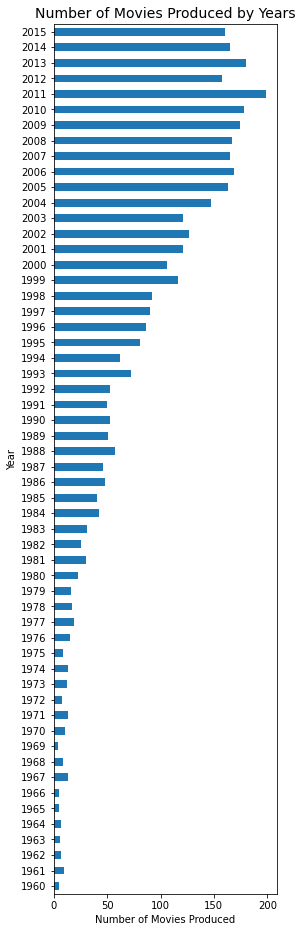

In [21]:
# Call the barChart function to plot horizontal barchart of Movies produced by year
barChart(df_movie, 'Number of Movies Produced', 'Year', 'Number of Movies Produced by Years', (4, 16))

The barchart above shows that there is a consistent increase in the number of movies produced per year

### Research Question 3: Are movies run time getting longer over the years.

In [22]:
# Calculate the average runtime of movies per year using the groupby function
df_runtime = df.groupby('release_year', as_index=False)['runtime'].mean()

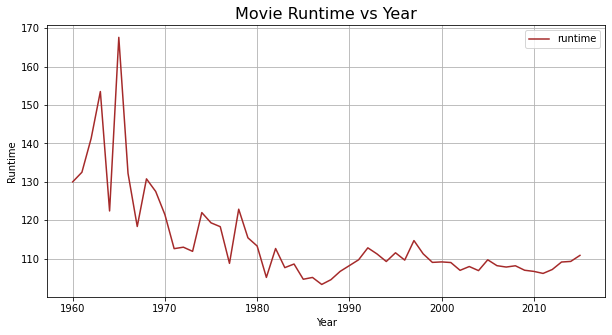

In [23]:
# Call the chart function to plot runtine against year
chart(df_runtime, 'release_year', 'Year', 'runtime', 'Runtime', 'Movie Runtime vs Year', 'brown')

The movie run time has consistently reduced over the years

### Research Question 4: Is the film industry making profit over the years.

In [24]:
# Create a profit column with values
df['profit'] = df['revenue'] - df['budget']

In [25]:
# Calculate the mean profit per year using the groupby function
df_profit = df.groupby('release_year', as_index=False)['profit'].mean()

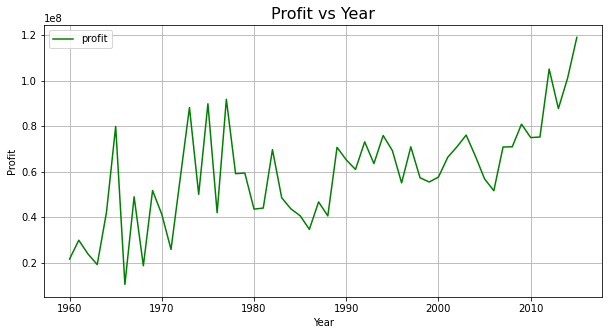

In [26]:
# Call the chart function to plot graph of Profit and Year
chart(df_profit, 'release_year', 'Year', 'profit', 'Profit', 'Profit vs Year', 'green')

The movie industry has made profit over the years, the consistent reduction in rating may be due to bad movie production or reduction in runtime.

### Research Question 5: Which genres are most popular from year to year.

First we extract all the unique years and genres into separate list, then we count the number of occurrence of each genre per year and append (year, genre and number of occurence) into a list called `data` and transform into a dataframe.

In [27]:
# Extract all the years into a list
year = list(df['release_year'].unique())

In [28]:
# Preview the first five objects in the list
year[:5]

[2015, 2014, 1977, 2009, 2010]

In [29]:
# Extract all the uniques genres in the dataset into a list

A = []
B = set()

# Pull all the genres from the dataframe into a list 
for i in df['genres']:
    A.append(i.split('|'))

# extract unique genres into set to prevent duplication
for i in A:
    for j in i:
        B.add(j)

# Convert set to list
genre = list(B)

In [30]:
# Preview the first five objects in the list
genre[:5]

['TV Movie', 'Thriller', 'Adventure', 'Drama', 'War']

In [31]:
# Calculate number of occurence of each genre per year and append into data
data = []

for i in year:
    # Filter DataFrame by each year
    df_ = df[df['release_year'] == i][['release_year', 'genres']]
    
    # Find the number of occuring genre per year
    for j in genre:
        # Number of rows each genres occur
        count = df_['genres'].str.contains(j).sum()
        K = i, j, count
        data.append(K)

In [32]:
# Preview data
data[:3]

[(2015, 'TV Movie', 0), (2015, 'Thriller', 47), (2015, 'Adventure', 34)]

In [33]:
# Convert data into DataFrame
df_genre = pd.DataFrame(data, columns=['year', 'genre', 'count']).sort_values(by=['year', 'count'], ascending=False)

In [34]:
# select the most popular genres per year
popular_genre = df_genre.groupby('year').head(1).set_index(['year', 'genre'])

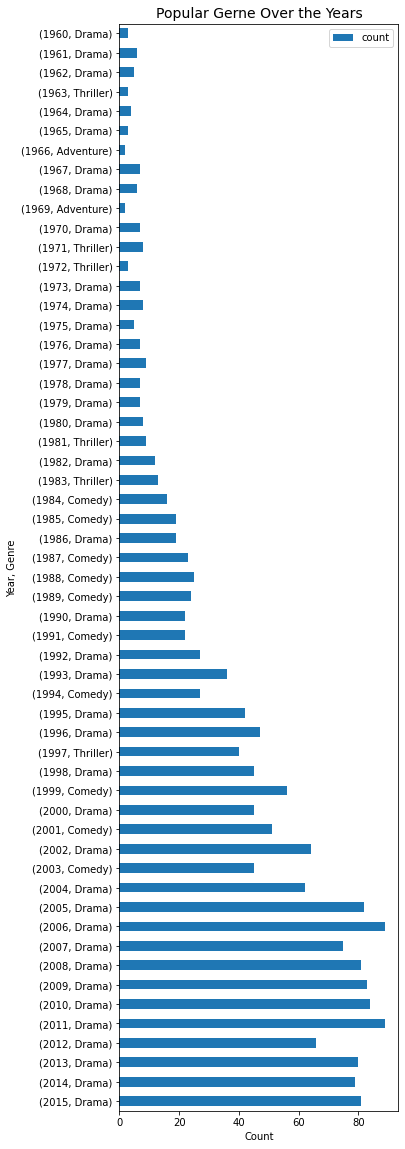

In [35]:
# Plot popular_genre on an horizintal barchart
barChart(popular_genre, 'Count', 'Year, Genre', 'Popular Gerne Over the Years', (5, 20))

From the barchart above, Drama is the most popular genre over the years

### Research Question 6: What kinds of properties are associated with movies that have high revenues?

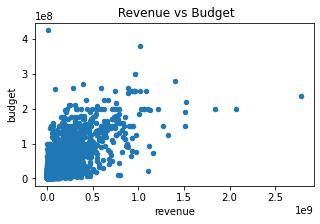

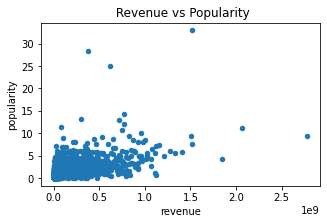

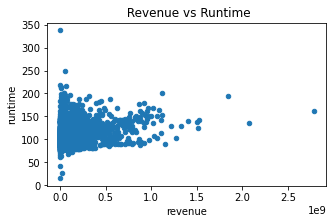

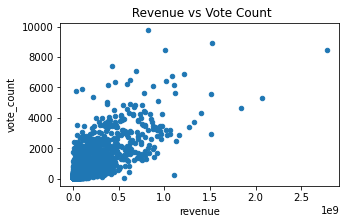

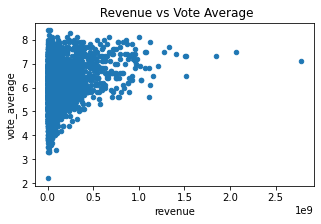

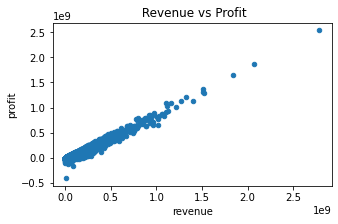

In [36]:
# 
df.plot(kind='scatter', x='revenue', y='budget', figsize=(5,3), title=' Revenue vs Budget')
df.plot(kind='scatter', x='revenue', y='popularity', figsize=(5,3), title=' Revenue vs Popularity')
df.plot(kind='scatter', x='revenue', y='runtime', figsize=(5,3), title=' Revenue vs Runtime')
df.plot(kind='scatter', x='revenue', y='vote_count', figsize=(5,3), title=' Revenue vs Vote Count')
df.plot(kind='scatter', x='revenue', y='vote_average', figsize=(5,3), title=' Revenue vs Vote Average')
df.plot(kind='scatter', x='revenue', y='profit', figsize=(5,3), title=' Revenue vs Profit')
plt.show()

From the charts above, we derive the following conclusion:
1. The higher the budget, the higher the revenue
2. A weak positive correlation, more popularity leads to silghtly higher revenue.
3. There is no correlation between revenue and runtime
4. Positive correlation between revenue and vote count.
5. No correlation between revenue and vote average
6. Strong positive correlation. The higher the revenue, the higher the profit

<a id='conclusions'></a>
## Conclusions



The Following conclusion were drawn:
* The voting average of movie reduced over the years
* More movies are produced over the years
* The average runtime of movies produced over the years reduced
* Despite the down trend on the vote average, the movie industry has been making consistent profit over the years
* Drama is the most popular gerne 
* Budget, vote count and popularity leads to high revenue and increased profit.


<a id='conclusions'></a>
## Limitations

There were 10,866 observations in the raw dataset. There were null and invalid values in some features like budget and revenue haveing zeros, runtime also having zeros which were replaced with nan and eventually dropped. Genre also has 23 nan which was dropped. The data also contains duplicate values which were dropped from the data set. There were outliers in the dataset for example runtime of some movies is 1 minute, 2 minutes etc which would affect the statistics done during the Analysis. Eventually only 3,854 observations were used for the analysis.